(569, 32)
Index(['ID number', 'Diagnosis', 'mean radius', 'mean texture',
       'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis               

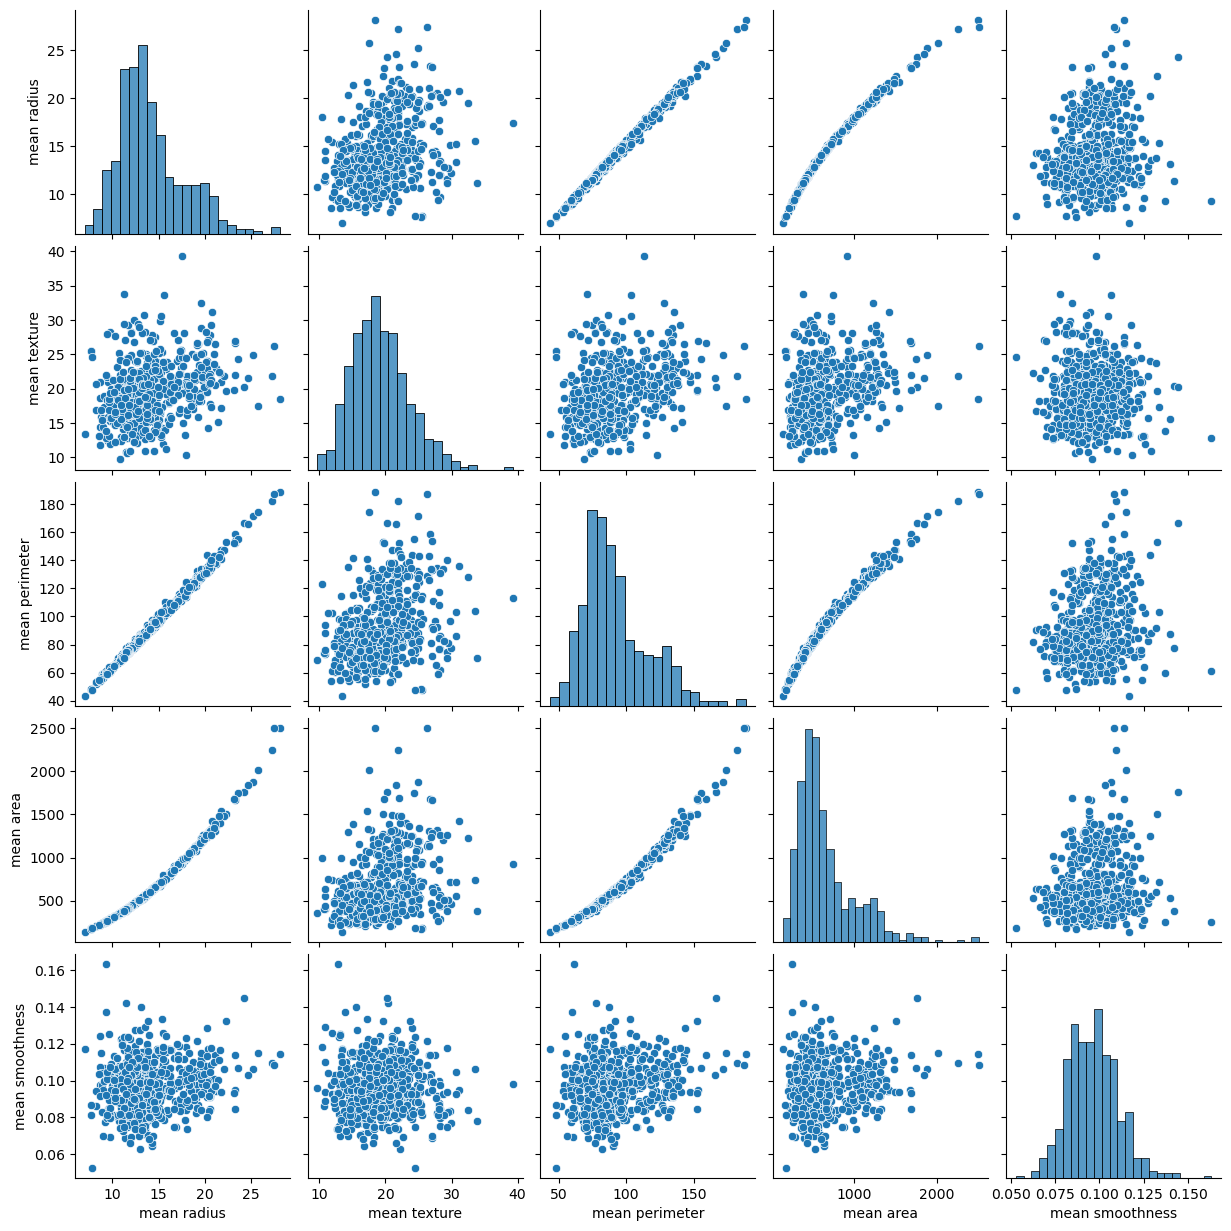

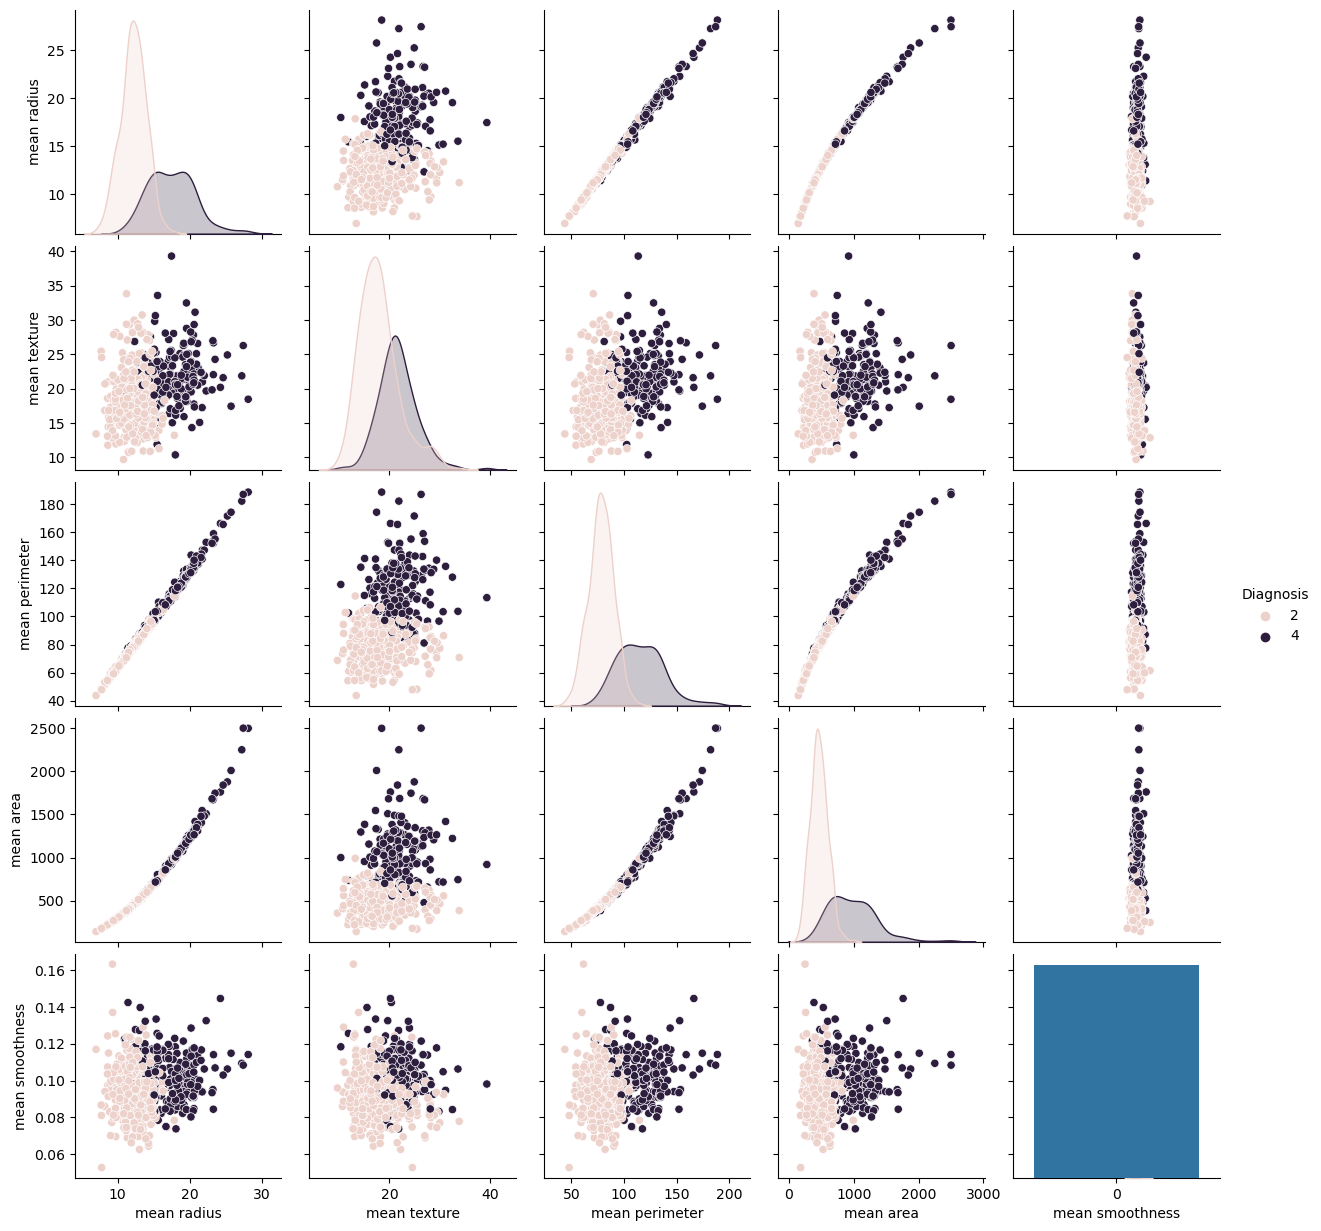

In [1]:
import pandas as pd   #library for data-processing
import numpy as np   #lbrary for linear Algebra
import matplotlib.pyplot as plt   #library for plotting graphs
import seaborn as sns    #library for visualization
%matplotlib inline

import warnings            # To suppress unnecessary/irrelevant warnings during execution of the code.
warnings.filterwarnings('ignore')

data = "D:\CDAC Internship 2023\Breast_Cancer_Dataset\wdbc.csv"  # Dataset is in form of a CSV File.   

df = pd.read_csv(data)    # Storing data from csv file in a tabular data structure called dataframe(pandas).
df.columns = df.columns.str.strip()   
print(df.shape)
print(df.columns)

# to check for Null Values in each feature.
print(df.info())  
print(df.isnull().sum()) 
print("There are no NULL values in the the entire Dataset.")

#Plotting the first 5 features in the Dataset.
sns.pairplot(df, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )
sns.pairplot(df, hue = 'Diagnosis', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])
print(df['Diagnosis'].value_counts())
sns.countplot(df['Diagnosis'], label = "Count")


plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)


Training_Features = df.drop(['Diagnosis','ID number'], axis = 1)  
# 'Training_Features' is the dataframe 'df' without Diagnosis and ID number parameters. 
print(Training_Features.head())
Target = df['Diagnosis']  
# 'Target' is the dataframe 'df' with only 1 parameter: Diagnosis.
print(Target.head())


# sklearn.model is a module in sklearn consisting of several classes and functions.
# train_test split is the function used for splitiing our dataset into training and testing data.
from sklearn.model_selection import train_test_split


Training_Data, Testing_Data, Target_Training_Data, Target_Testing_Data = train_test_split(Training_Features, Target, test_size = 0.3, random_state = 20)
print ('The size of our Training Data (input features) is', Training_Data.shape)
print ('\n')
print ('The size of our Testing Data (input features) is', Testing_Data.shape)
print ('\n')
print ('The size of our Training Target (output feature) is', Target_Training_Data.shape)
print ('\n')
print ('The size of our Testing Target (output features) is', Target_Testing_Data.shape)



# sklearn.svm is a module in sklearn having functions and classes to implement SVM Algorithm
from sklearn.svm import SVC
#Training the Model.
svc_model = SVC()
svc_model.fit(Training_Data, Target_Training_Data)
Predicted_Target_Values = svc_model.predict(Testing_Data)


#Evaluation of our model.(Confusion Matrix)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Target_Testing_Data, Predicted_Target_Values)
# 'cm' variable will be a numpy array containing the values from the confusion matrix.
# 'confusion_matrix' function will compare the predicted values with the observed.
print('Confusion matrix\n\n', cm)
# accessing values(TP,TN,FP and FN)  by indexing since cm is an array(numpy).
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print ('\n')
accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Accuracy of Model =", accuracy)
precision = TP / float(TP + FP)
print("Precision of Model =", precision)


#Improving our Model(Normalization Technique)

Training_Data_Min = Training_Data.min()
Training_Data_Min
Training_Data_Max = Training_Data.max()
Training_Data_Max
Training_Data_Range = (Training_Data_Max- Training_Data_Min)
Training_Data_Range
Training_Data_Scaled = (Training_Data - Training_Data_Min)/(Training_Data_Range)
Training_Data_Scaled.head()
Testing_Data_Min = Testing_Data.min()
Testing_Data_Range = (Testing_Data - Testing_Data_Min).max()
Testing_Data_Scaled = (Testing_Data - Testing_Data_Min)/Testing_Data_Range


#Feeding the Normalised values (scaled down to a range) to our SVM Model.
svc_model = SVC()
svc_model.fit(Training_Data_Scaled, Target_Training_Data)
Predicted_Target_Values_Normalization = svc_model.predict(Testing_Data_Scaled)


#Evaluation of our model(after applying normalization).
cm = confusion_matrix(Target_Testing_Data, Predicted_Target_Values_Normalization)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print ('\n')
accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Accuracy of Model after Normalization =", accuracy)
precision = TP / float(TP + FP)
print("Precision of Model after Normalization =", precision)


param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(Training_Data_Scaled,Target_Training_Data)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)
Predicted_Target_Values_rbf = grid.predict(Testing_Data_Scaled)

#Evaluation of our model(rbf kernel).
cm = confusion_matrix(Target_Testing_Data, Predicted_Target_Values_rbf)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print ('\n')
accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Accuracy of Model(rbf kernel) =",accuracy)
precision = TP / float(TP + FP)
print("Precision of Model(rbf kernel) =", precision)